In [1]:
# Importing Importantn Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import geopandas as gpd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



## Data Reading

In [2]:
df = pd.read_csv("mnrega.csv")

## Data Preprocessing

In [3]:
df.head(5) # First 5 entries

Rowid Country  State lgd code              State  District lgd code  \
0      1   India               1  Jammu And Kashmir                  1   
1      2   India               1  Jammu And Kashmir                  1   
2      3   India               1  Jammu And Kashmir                  1   
3      4   India               1  Jammu And Kashmir                  1   
4      5   India               1  Jammu And Kashmir                  1   

   District                              Year  Yearcode  \
0  Anantnag  Financial Year (Apr - Mar), 2011      2011   
1  Anantnag  Financial Year (Apr - Mar), 2012      2012   
2  Anantnag  Financial Year (Apr - Mar), 2013      2013   
3  Anantnag  Financial Year (Apr - Mar), 2014      2014   
4  Anantnag  Financial Year (Apr - Mar), 2015      2015   

   Households that applied for a job card  Job cards issued  ...  \
0                                 54411.0           39369.0  ...   
1                                 67486.0           55717.0  ...   
2                                 72022.0           60807.0  ...   
3                                 79197.0           74665.0  ...   
4                                 91509.0           86636.0  ...   

   Amount sanctioned  \
0            5449.28   
1          839137.36   
2           85017.53   
3            6967.18   
4         2237866.00   

   Works under mahatma gandhi national rural employment guarantee act (mgnrega)  \
0                                            27954.0                              
1                                            40190.0                              
2                                            36299.0                              
3                                            19485.0                              
4                                            49481.0                              

   Total bank accounts  Individual bank accounts  Joint bank accounts  \
0              40666.0                   27093.0              13573.0   
1              74081.0                   68437.0               5644.0   
2              84805.0                   79041.0               5764.0   
3             116182.0                  110495.0               5687.0   
4             167455.0                  161638.0               5817.0   

   Amount disbursed to bank accounts  Post office accounts  \
0                         71303212.0                5875.0   
1                        123892241.0                2864.0   
2                        185087705.0                2585.0   
3                         70248477.0                2325.0   
4                        228564362.0                1892.0   

   Individual post office accounts  Joint post office accounts  \
0                           3264.0                      2611.0   
1                           1674.0                      1190.0   
2                           1531.0                      1054.0   
3                           1469.0                       856.0   
4                           1408.0                       484.0   

   Amount disbursed to post office accounts  
0                                20954501.0  
1                                 8005814.0  
2                                  991848.0  
3                                  121787.0  
4                                  664223.0  

[5 rows x 47 columns]

### Checking if linear reln between colms

In [4]:
correlation_matrix = df.corr()

In [5]:
correlation_matrix

Rowid  State lgd code  \
Rowid                                               1.000000        0.992549   
State lgd code                                      0.992549        1.000000   
District lgd code                                   0.698022        0.668201   
Yearcode                                            0.000668       -0.000976   
Households that applied for a job card              0.123215        0.131378   
Job cards issued                                    0.131068        0.139890   
Job cards issued for scheduled caste               -0.028273       -0.018795   
Job cards issued for scheduled tribes               0.163180        0.162461   
Job cards issued for non scheduled tribes or sc...  0.136237        0.144648   
Households that demanded work                       0.152907        0.181033   
Persons who demanded work                           0.209116        0.229587   
Households that were allotted work                  0.151478        0.179779   
Persons that were allotted work                     0.206942        0.227652   
Muster rolls filled                                 0.189057        0.203232   
Households that worked under mahatma gandhi nat...  0.178581        0.207072   
Persons that worked under mahatma gandhi nation...  0.230338        0.251491   
Households that reached a 100 day limit             0.199243        0.220001   
Persons with disability                             0.220046        0.225284   
Non scheduled tribes or scheduled caste houehol...  0.196509        0.224274   
Total person days worked by non scheduled tribe...  0.212448        0.237974   
Scheduled caste houeholds that worked               0.075867        0.102051   
Total person days worked scheduled caste persons    0.123869        0.151513   
Scheduled tribe houeholds that worked               0.082476        0.089005   
Total person days worked scheduled tribe persons    0.060041        0.068427   
Households that worked on land reform or indira...  0.169183        0.165490   
Total person days worked by women                   0.258859        0.292586   
Total person days                                   0.197661        0.225378   
Scheduled caste households that reached a 100 d...  0.183220        0.202958   
Scheduled tribe households that reached a 100 d...  0.040876        0.048315   
Labour expenditure that has been disbursed          0.214564        0.239656   
Material expenditure that has been disbursed        0.136311        0.139519   
Labour expenditure both disbursed and pending       0.212569        0.237289   
Material expenditure both disbursed and pending     0.112680        0.115110   
Amount sanctioned                                   0.002114        0.002872   
Works under mahatma gandhi national rural emplo...  0.168611        0.174021   
Total bank accounts                                 0.106567        0.130795   
Individual bank accounts                            0.089338        0.115081   
Joint bank accounts                                 0.144280        0.140016   
Amount disbursed to bank accounts                   0.148753        0.173382   
Post office accounts                                0.117944        0.119874   
Individual post office accounts                     0.106426        0.109644   
Joint post office accounts                          0.123967        0.115215   
Amount disbursed to post office accounts            0.106502        0.106627   

                                                    District lgd code  \
Rowid                                                        0.698022   
State lgd code                                               0.668201   
District lgd code                                            1.000000   
Yearcode                                                     0.000774   
Households that applied for a job card                      -0.084818   
Job cards issued                                            -0.078595   
Job cards issued for sc

In [6]:
df.shape # Dimension of data

(6858, 47)

In [7]:
df.describe().transpose() # Description of the dataframe

count          mean  \
Rowid                                               6858.0  3.429500e+03   
State lgd code                                      6858.0  1.726247e+01   
District lgd code                                   6858.0  3.587059e+02   
Yearcode                                            6858.0  2.015499e+03   
Households that applied for a job card              6858.0  1.872358e+05   
Job cards issued                                    6858.0  1.824940e+05   
Job cards issued for scheduled caste                6858.0  3.842256e+04   
Job cards issued for scheduled tribes               6858.0  2.397257e+04   
Job cards issued for non scheduled tribes or sc...  6858.0  1.200989e+05   
Households that demanded work                       6858.0  7.747072e+04   
Persons who demanded work                           6858.0  1.203593e+05   
Households that were allotted work                  6858.0  7.729288e+04   
Persons that were allotted work                     6858.0  1.199426e+05   
Muster rolls filled                                 6858.0  6.957653e+04   
Households that worked under mahatma gandhi nat...  6858.0  7.138718e+04   
Persons that worked under mahatma gandhi nation...  6858.0  1.070131e+05   
Households that reached a 100 day limit             6858.0  6.038103e+03   
Persons with disability                             6858.0  5.866304e+02   
Non scheduled tribes or scheduled caste houehol...  6858.0  4.397141e+04   
Total person days worked by non scheduled tribe...  6858.0  2.045404e+06   
Scheduled caste houeholds that worked               6858.0  1.557485e+04   
Total person days worked scheduled caste persons    6858.0  7.130604e+05   
Scheduled tribe houeholds that worked               6858.0  1.158319e+04   
Total person days worked scheduled tribe persons    6858.0  5.845150e+05   
Households that worked on land reform or indira...  6858.0  2.197225e+03   
Total person days worked by women                   6858.0  1.781924e+06   
Total person days                                   6858.0  3.343058e+06   
Scheduled caste households that reached a 100 d...  6858.0  9.221430e+02   
Scheduled tribe households that reached a 100 d...  6858.0  8.494867e+02   
Labour expenditure that has been disbursed          6805.0  5.391599e+03   
Material expenditure that has been disbursed        6805.0  1.872833e+03   
Labour expenditure both disbursed and pending       6805.0  5.448055e+03   
Material expenditure both disbursed and pending     6805.0  2.144997e+03   
Amount sanctioned                                   6805.0  1.495473e+11   
Works under mahatma gandhi national rural emplo...  6805.0  1.041997e+05   
Total bank accounts                                 6858.0  1.494515e+05   
Individual bank accounts                            6858.0  1.373657e+05   
Joint bank accounts                                 6858.0  1.208586e+04   
Amount disbursed to bank accounts                   6858.0  4.371824e+08   
Post office accounts                                6858.0  2.839986e+04   
Individual post office accounts                     6858.0  2.491672e+04   
Joint post office accounts                          6858.0  3.483138e+03   
Amount disbursed to post office accounts            6858.0  4.322992e+07   

                                                             std          min  \
Rowid                                               1.979878e+03     1.000000   
State lgd code                                      9.244997e+00     1.000000   
District lgd code                                   2.073143e+02     1.000000   
Yearcode                                            2.871881e+00  2011.000000   
Households that applied for a job card              1.735174e+05     0.000000   
Job cards issued                                    1.689734e+05     0.000000   
Job cards issued for scheduled caste                4.890319e+04     0.000000   
Job cards issued for scheduled tribes               3.942358

In [8]:
df.isna().sum() # checking for null values and which col has how many null values

Rowid                                                                                             0
Country                                                                                           0
State lgd code                                                                                    0
State                                                                                             0
District lgd code                                                                                 0
District                                                                                          0
Year                                                                                              0
Yearcode                                                                                          0
Households that applied for a job card                                                            0
Job cards issued                                                                                  0


In [9]:
column_names = df.columns
column_names # Header

Index(['Rowid', 'Country', 'State lgd code', 'State', 'District lgd code',
       'District', 'Year', 'Yearcode',
       'Households that applied for a job card', 'Job cards issued',
       'Job cards issued for scheduled caste',
       'Job cards issued for scheduled tribes',
       'Job cards issued for non scheduled tribes or scheduled caste',
       'Households that demanded work', 'Persons who demanded work',
       'Households that were allotted work', 'Persons that were allotted work',
       'Muster rolls filled',
       'Households that worked under mahatma gandhi national rural employment guarantee act (mgnrega)',
       'Persons that worked under mahatma gandhi national rural employment guarantee act (mgnrega)',
       'Households that reached a 100 day limit', 'Persons with disability',
       'Non scheduled tribes or scheduled caste houeholds that worked',
       'Total person days worked by non scheduled tribes or scheduled caste persons.',
       'Scheduled caste houehol

In [10]:
df.info() # Tells type and Non-null count of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6858 entries, 0 to 6857
Data columns (total 47 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Rowid                                                                                          6858 non-null   int64  
 1   Country                                                                                        6858 non-null   object 
 2   State lgd code                                                                                 6858 non-null   int64  
 3   State                                                                                          6858 non-null   object 
 4   District lgd code                                                                              6858 non-null   int64  
 5   District            

In [11]:
df = df.drop("Country",axis=True) # Dropping Country Column

In [12]:
df = df.drop("Rowid",axis=True) # Dropping Rowid Column

In [13]:
df = df.drop("Year",axis=True) # Dropping Year Column

In [14]:
df.columns

Index(['State lgd code', 'State', 'District lgd code', 'District', 'Yearcode',
       'Households that applied for a job card', 'Job cards issued',
       'Job cards issued for scheduled caste',
       'Job cards issued for scheduled tribes',
       'Job cards issued for non scheduled tribes or scheduled caste',
       'Households that demanded work', 'Persons who demanded work',
       'Households that were allotted work', 'Persons that were allotted work',
       'Muster rolls filled',
       'Households that worked under mahatma gandhi national rural employment guarantee act (mgnrega)',
       'Persons that worked under mahatma gandhi national rural employment guarantee act (mgnrega)',
       'Households that reached a 100 day limit', 'Persons with disability',
       'Non scheduled tribes or scheduled caste houeholds that worked',
       'Total person days worked by non scheduled tribes or scheduled caste persons.',
       'Scheduled caste houeholds that worked',
       'Total pers

In [15]:
df.isna().sum() # checking for null values and which col has how many null values

State lgd code                                                                                    0
State                                                                                             0
District lgd code                                                                                 0
District                                                                                          0
Yearcode                                                                                          0
Households that applied for a job card                                                            0
Job cards issued                                                                                  0
Job cards issued for scheduled caste                                                              0
Job cards issued for scheduled tribes                                                             0
Job cards issued for non scheduled tribes or scheduled caste                                      0


In [16]:
# Check for missing values in each column
missing_in_columns = df.isna().sum()
print(missing_in_columns)


State lgd code                                                                                    0
State                                                                                             0
District lgd code                                                                                 0
District                                                                                          0
Yearcode                                                                                          0
Households that applied for a job card                                                            0
Job cards issued                                                                                  0
Job cards issued for scheduled caste                                                              0
Job cards issued for scheduled tribes                                                             0
Job cards issued for non scheduled tribes or scheduled caste                                      0


In [17]:
import pandas as pd

for index, row in df.iterrows():
    # Check if all columns in the row are zero
    if (pd.isna(row) | (row == 0)).any():
        # If all columns are zero, fill NaN values in that row with zero
        df.loc[index] = df.loc[index].fillna(0)

# Now, all rows with all zero values have NaNs filled with zero


In [18]:
df.isna().sum()

State lgd code                                                                                   0
State                                                                                            0
District lgd code                                                                                0
District                                                                                         0
Yearcode                                                                                         0
Households that applied for a job card                                                           0
Job cards issued                                                                                 0
Job cards issued for scheduled caste                                                             0
Job cards issued for scheduled tribes                                                            0
Job cards issued for non scheduled tribes or scheduled caste                                     0
Households

In [19]:
df.describe().style.background_gradient(cmap='Oranges')

### Checking outliers


In [20]:
dfnew=df

In [21]:
df.columns

Index(['State lgd code', 'State', 'District lgd code', 'District', 'Yearcode',
       'Households that applied for a job card', 'Job cards issued',
       'Job cards issued for scheduled caste',
       'Job cards issued for scheduled tribes',
       'Job cards issued for non scheduled tribes or scheduled caste',
       'Households that demanded work', 'Persons who demanded work',
       'Households that were allotted work', 'Persons that were allotted work',
       'Muster rolls filled',
       'Households that worked under mahatma gandhi national rural employment guarantee act (mgnrega)',
       'Persons that worked under mahatma gandhi national rural employment guarantee act (mgnrega)',
       'Households that reached a 100 day limit', 'Persons with disability',
       'Non scheduled tribes or scheduled caste houeholds that worked',
       'Total person days worked by non scheduled tribes or scheduled caste persons.',
       'Scheduled caste houeholds that worked',
       'Total pers

In [22]:
drop = ['State lgd code', 'State', 'District lgd code',
       'District', 'Yearcode']

dfnew=dfnew.drop(columns=drop)

In [23]:
dfnew

Households that applied for a job card  Job cards issued  \
0                                    54411.0           39369.0   
1                                    67486.0           55717.0   
2                                    72022.0           60807.0   
3                                    79197.0           74665.0   
4                                    91509.0           86636.0   
...                                      ...               ...   
6853                                     0.0               0.0   
6854                                     0.0               0.0   
6855                                     0.0               0.0   
6856                                     0.0               0.0   
6857                                     0.0               0.0   

      Job cards issued for scheduled caste  \
0                                     27.0   
1                                     30.0   
2                                     34.0   
3                                     33.0   
4                                     37.0   
...                                    ...   
6853                                   0.0   
6854                                   0.0   
6855                                   0.0   
6856                                   0.0   
6857                                   0.0   

      Job cards issued for scheduled tribes  \
0                                    3257.0   
1                                    3820.0   
2                                    3917.0   
3                                    4851.0   
4                                    4976.0   
...                                     ...   
6853                                    0.0   
6854                                    0.0   
6855                                    0.0   
6856                                    0.0   
6857                                    0.0   

      Job cards issued for non scheduled tribes or scheduled caste  \
0                                               36085.0              
1                                               51867.0              
2                                               56856.0              
3                                               69781.0              
4                                               81623.0              
...                                                 ...              
6853                                                0.0              
6854                                                0.0              
6855                                                0.0              
6856                                                0.0              
6857                                                0.0              

      Households that demanded work  Persons who demanded work  \
0                           25226.0                    55222.0   
1                           34569.0                    76605.0   
2                           38214.0                    66308.0   
3                           21501.0                    36724.0   
4                           54947.0                   118467.0   
...                             ...                        ...   
6853                            0.0                        0.0   
6854                            0.0                        0.0   
6855                            0.0                        0.0   
6856                            0.0                        0.0   
6857                            0.0                        0.0   

      Households that were allotted work  Persons that were allotted work  \
0                                25098.0                          54938.0   
1                                34380.0                          76096.0   
2                                38188.0                          66220.0   
3                                21478.0                          36676.0   
4                                54939.0                         118339.0   

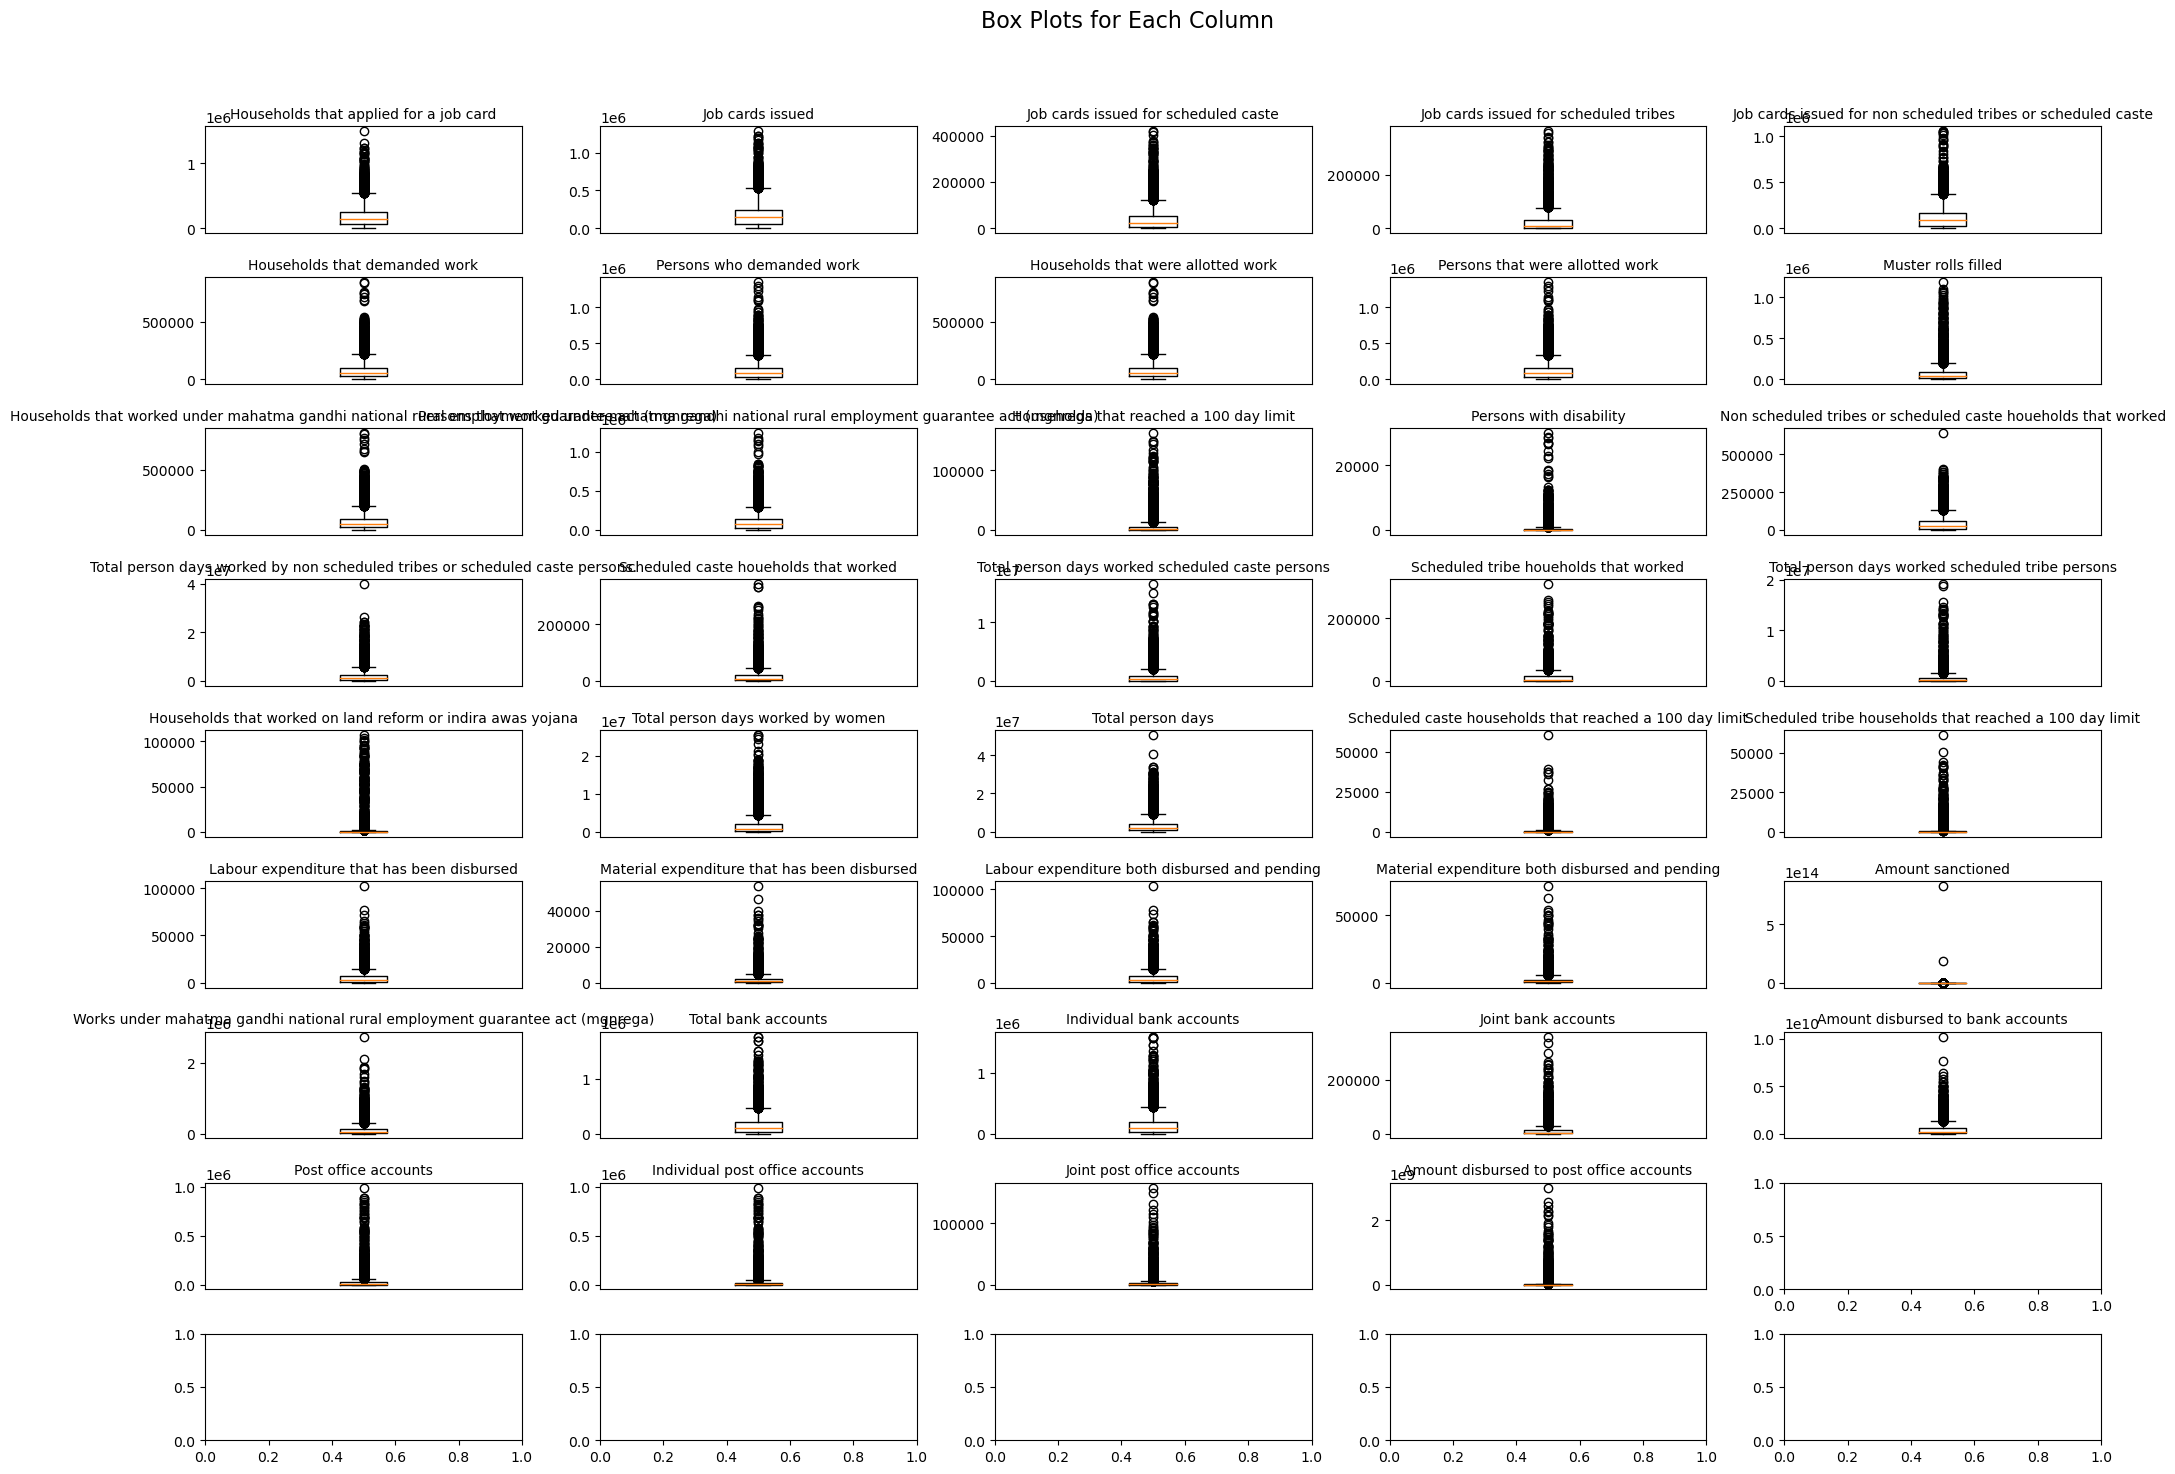

In [24]:
fig, axes = plt.subplots(9, 5, figsize=(20, 15))
fig.suptitle('Box Plots for Each Column', fontsize=16)

# Loop through each column and create box plots
for i, column in enumerate(dfnew.columns):
    row = i // 5
    col = i % 5
    axes[row, col].boxplot(df[column])
    axes[row, col].set_title(column, fontsize=10)
    axes[row, col].get_xaxis().set_visible(False)

# Adjust subplot layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


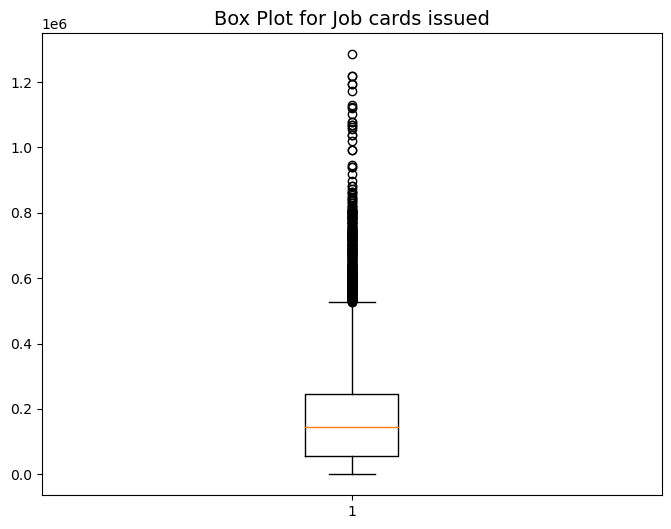

In [28]:
import matplotlib.pyplot as plt

# Choose the column for which you want to create a box plot
selected_column = 'Job cards issued'

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a box plot for the selected column
ax.boxplot(df[selected_column])
ax.set_title(f'Box Plot for {selected_column}', fontsize=14)

# Show the plot
plt.show()


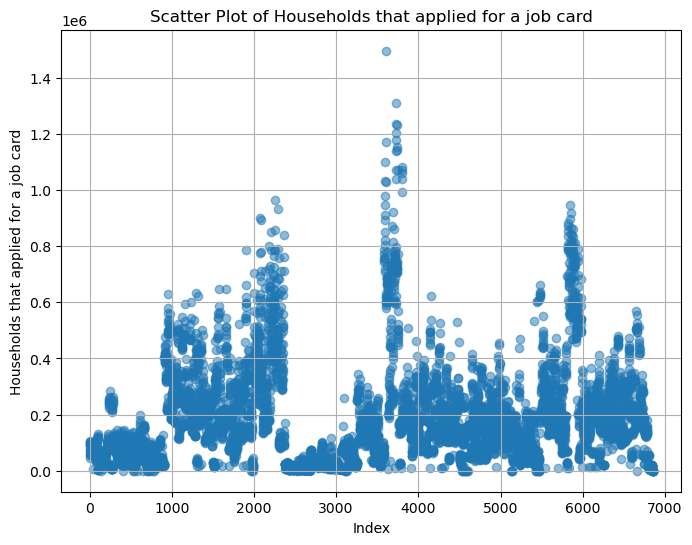

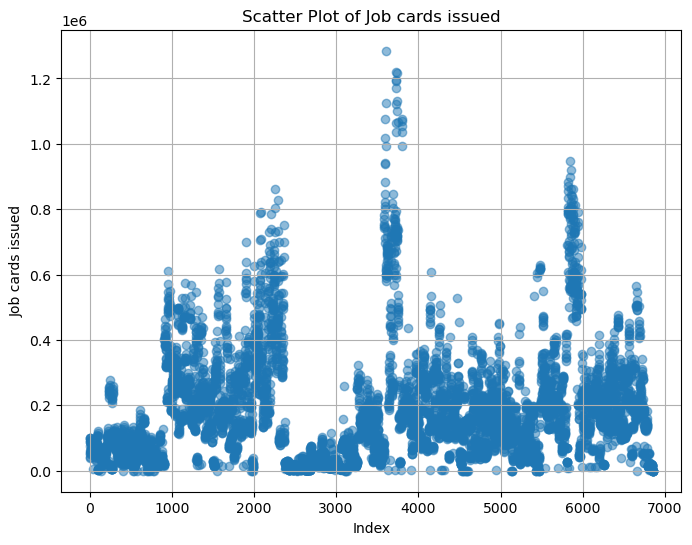

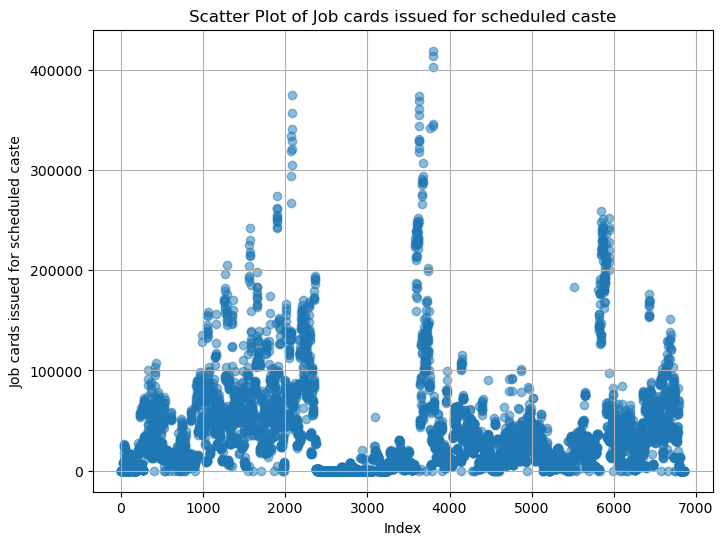

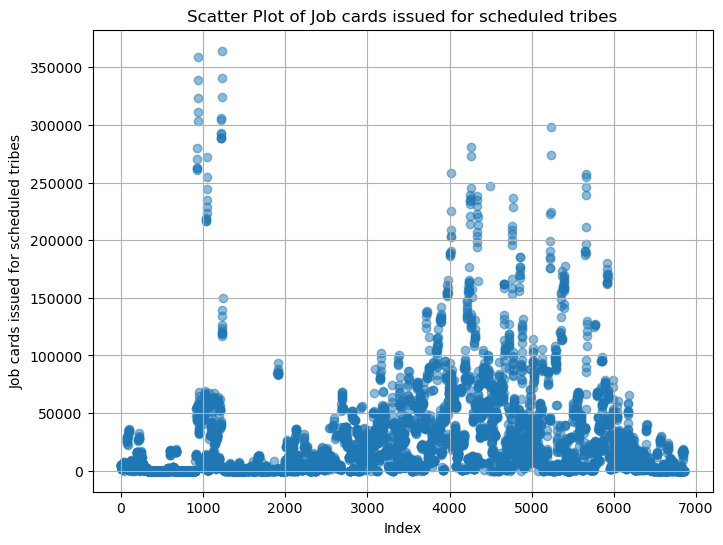

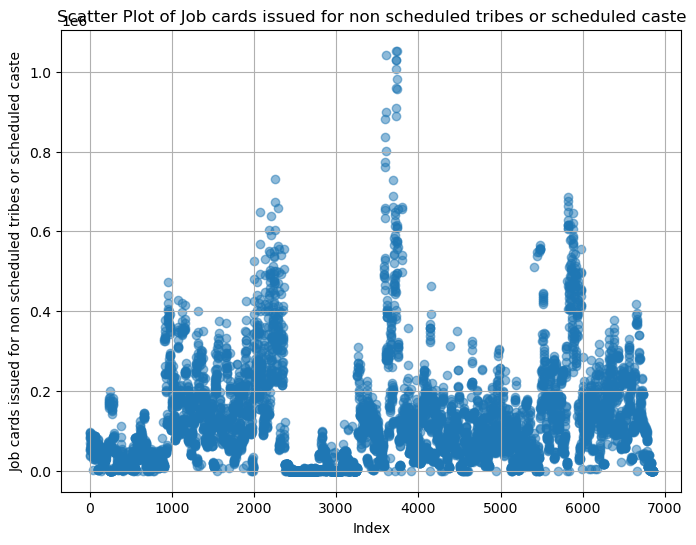

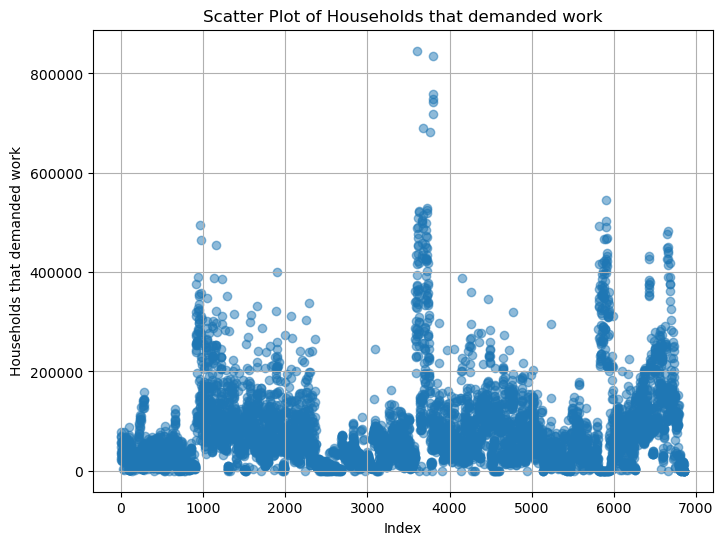

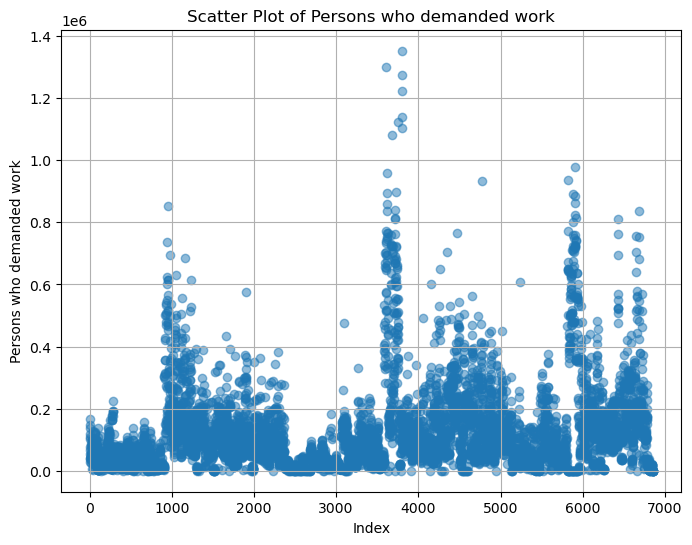

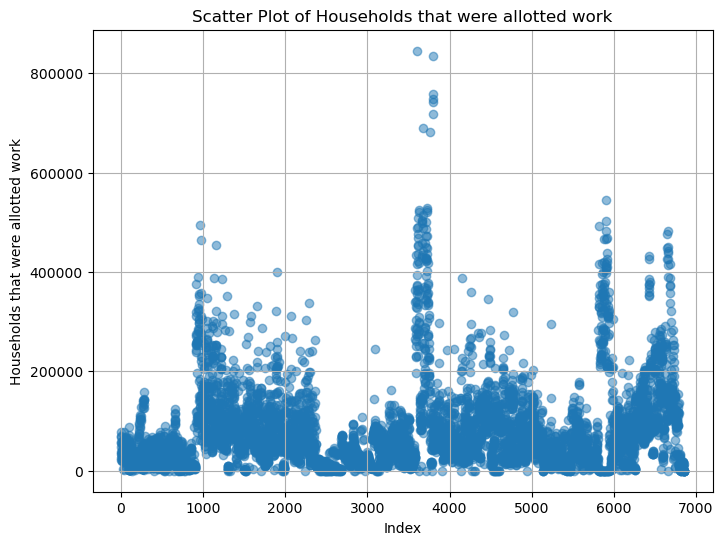

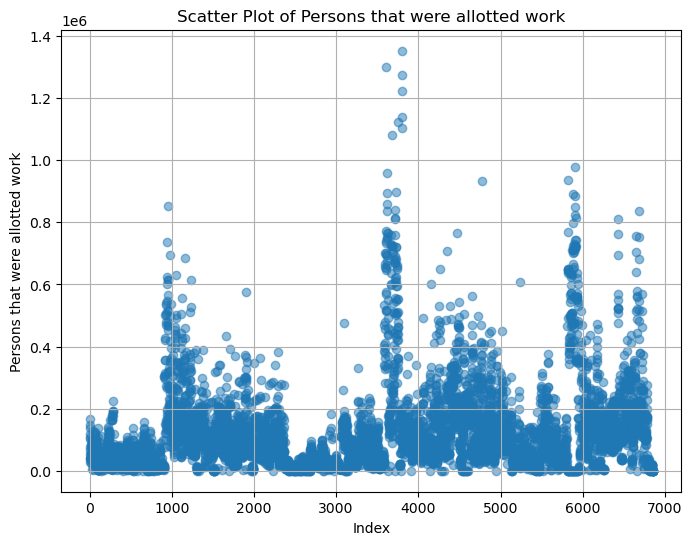

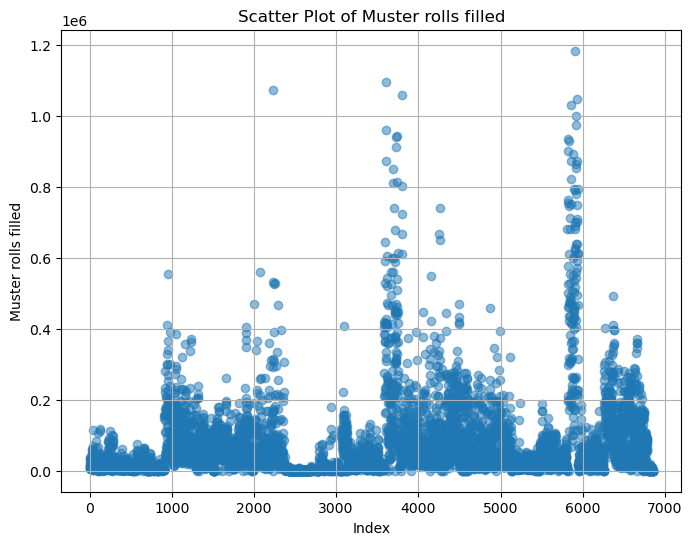

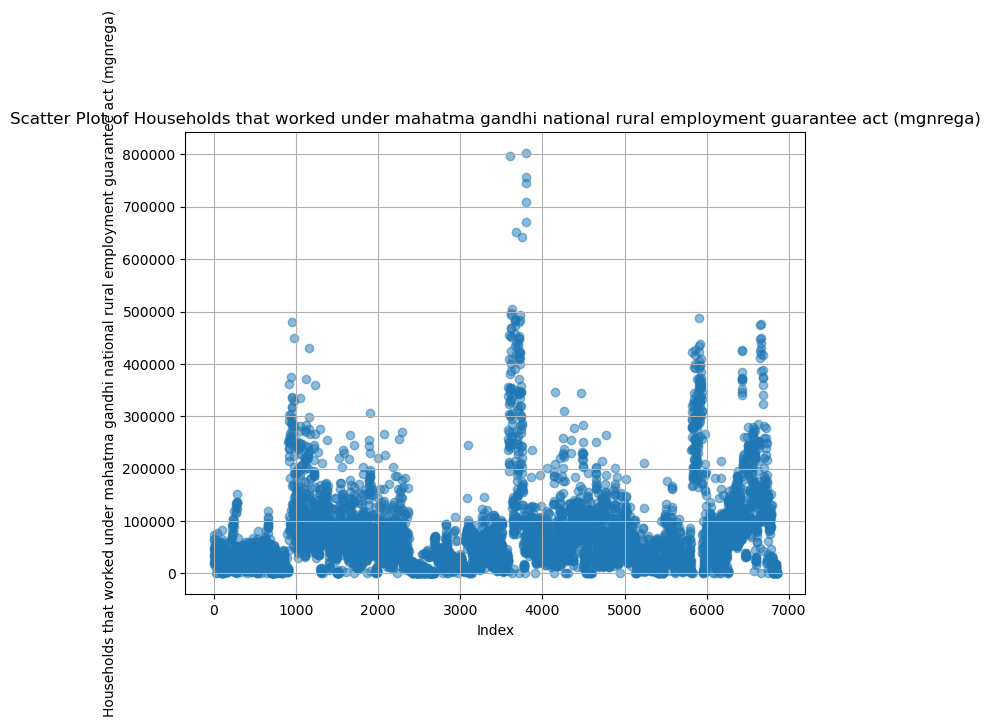

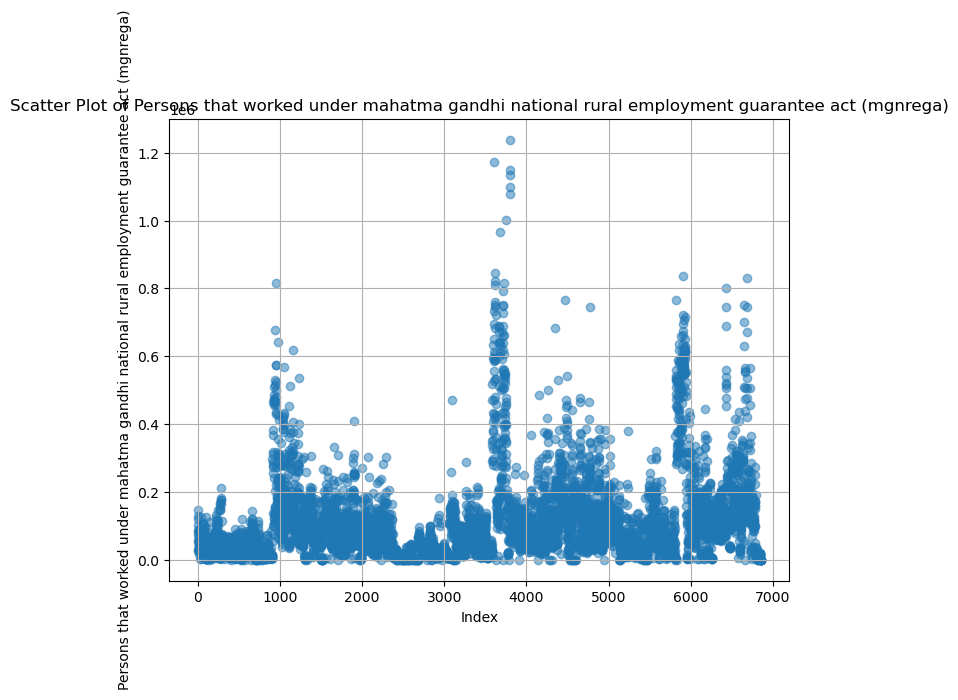

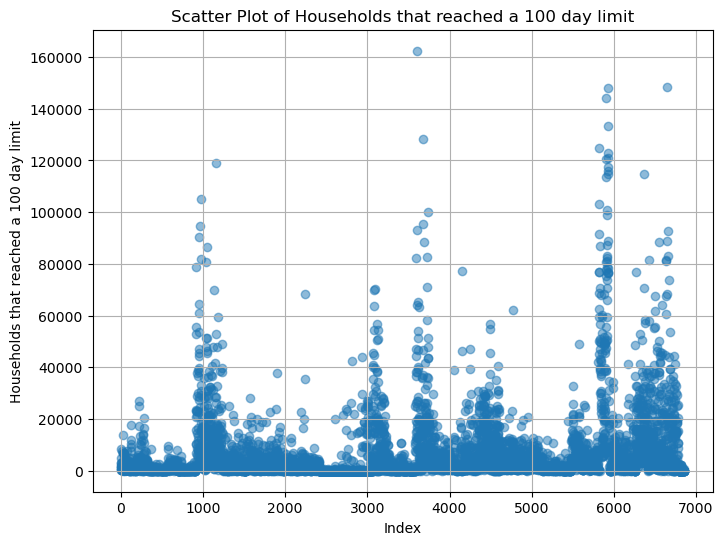

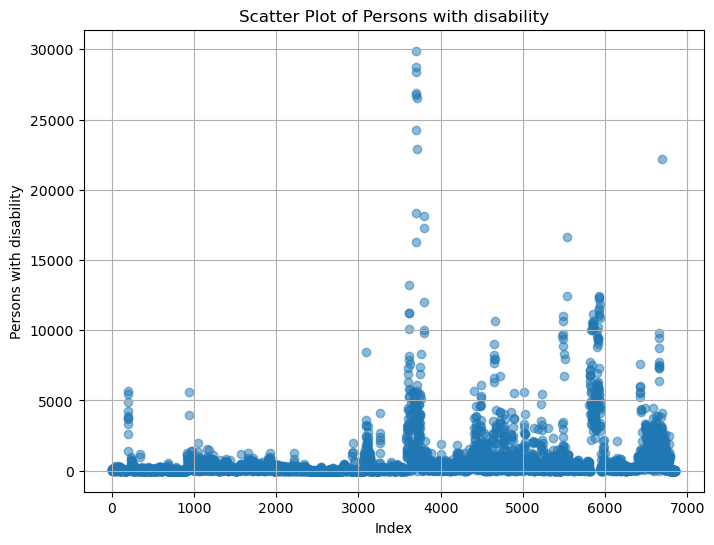

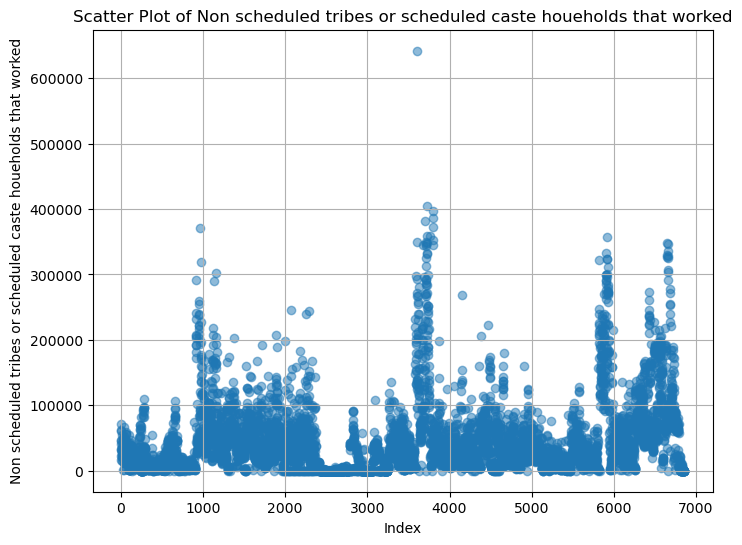

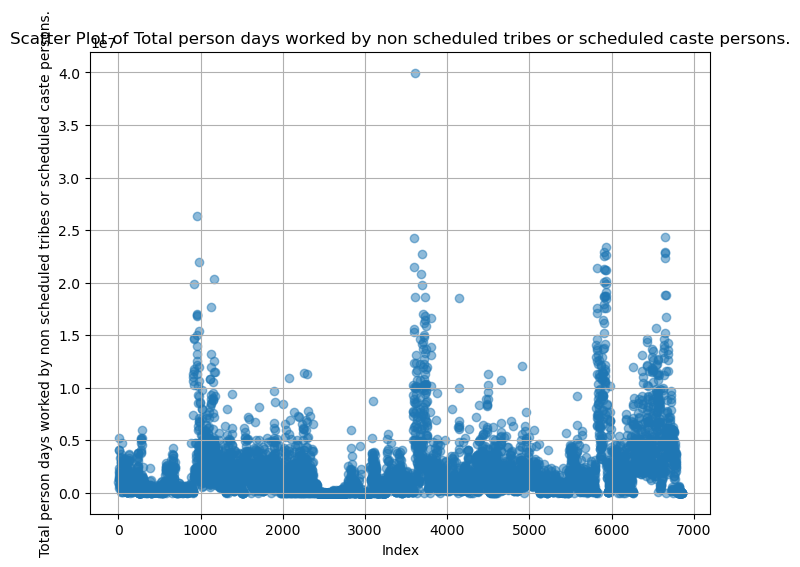

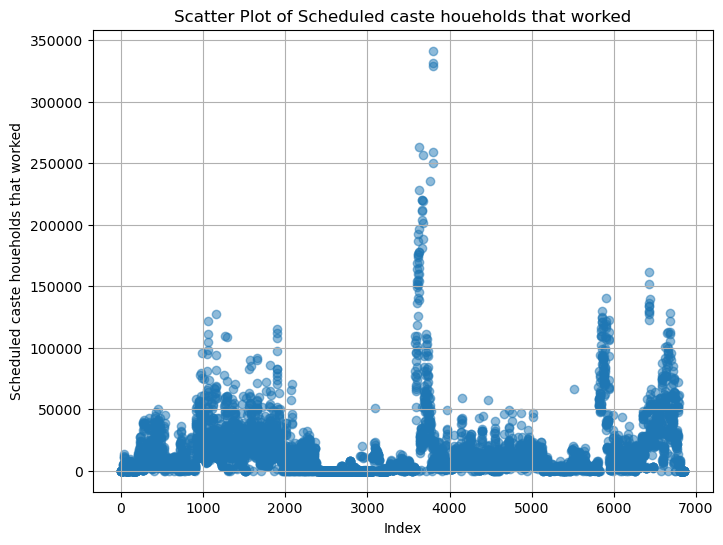

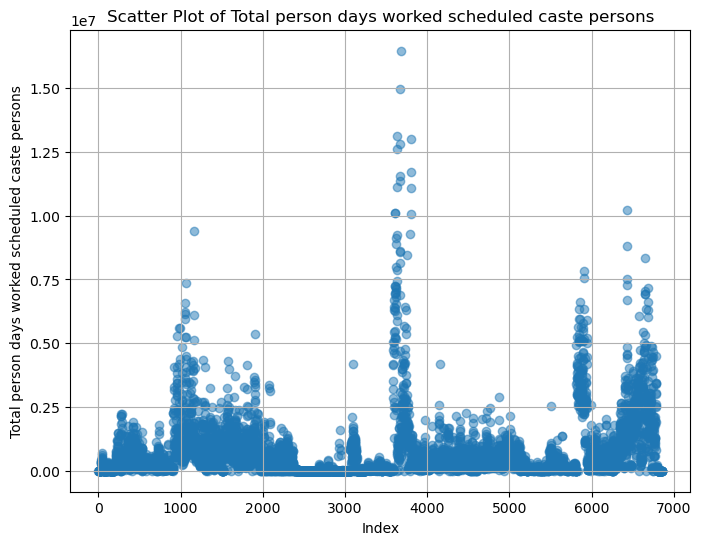

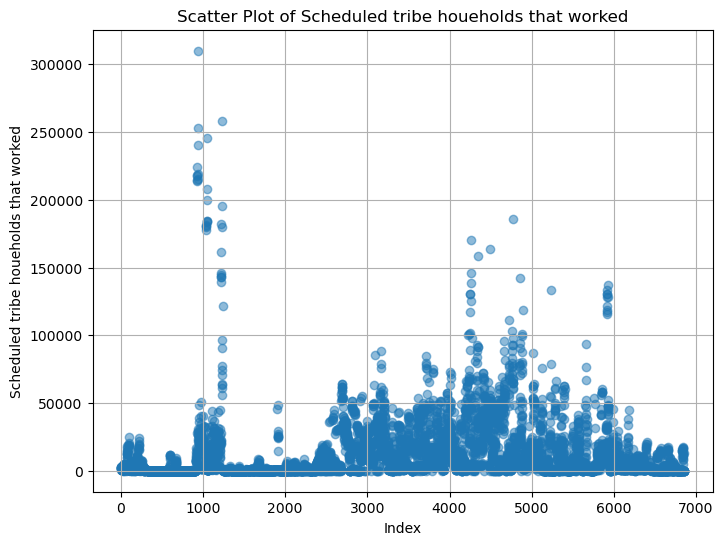

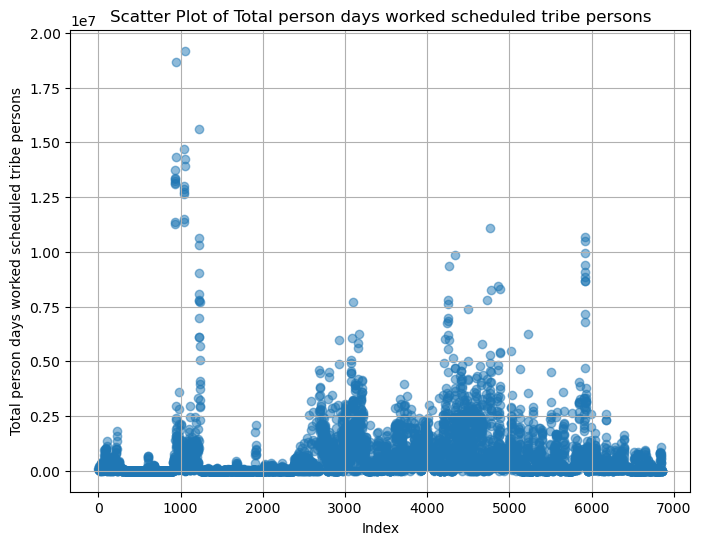

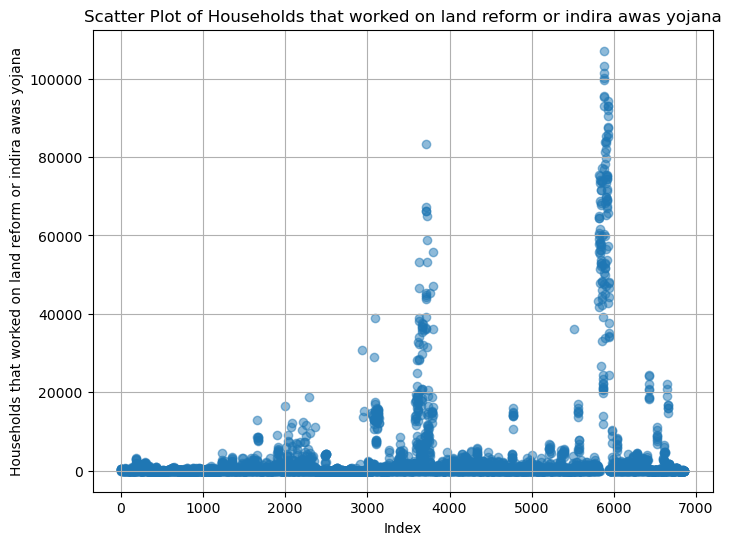

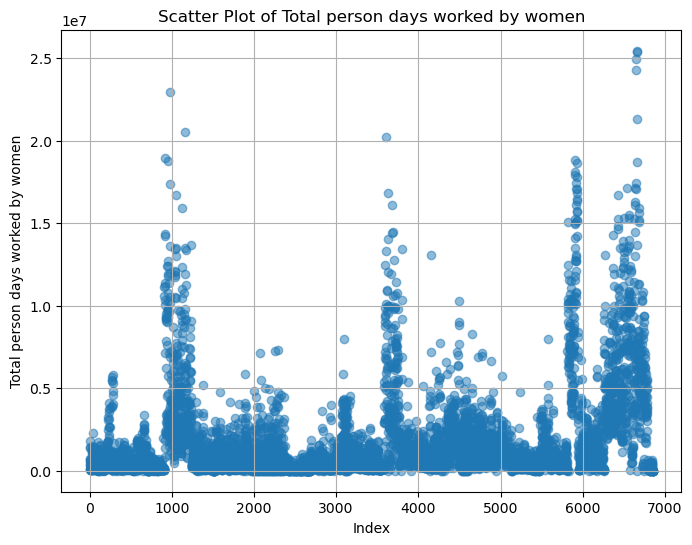

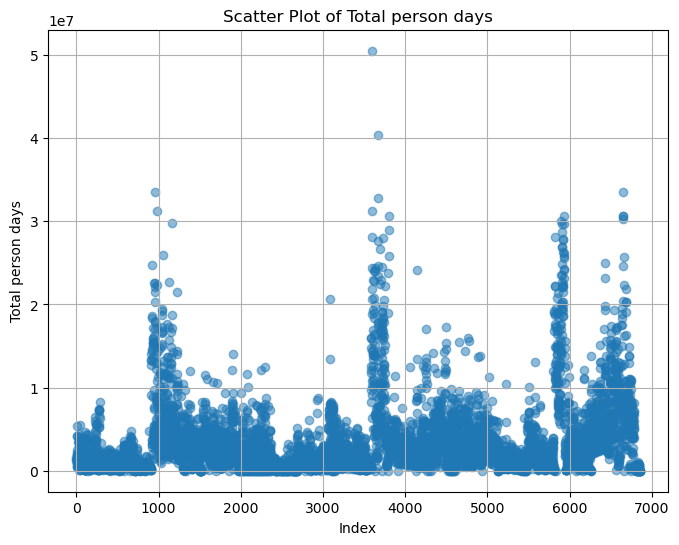

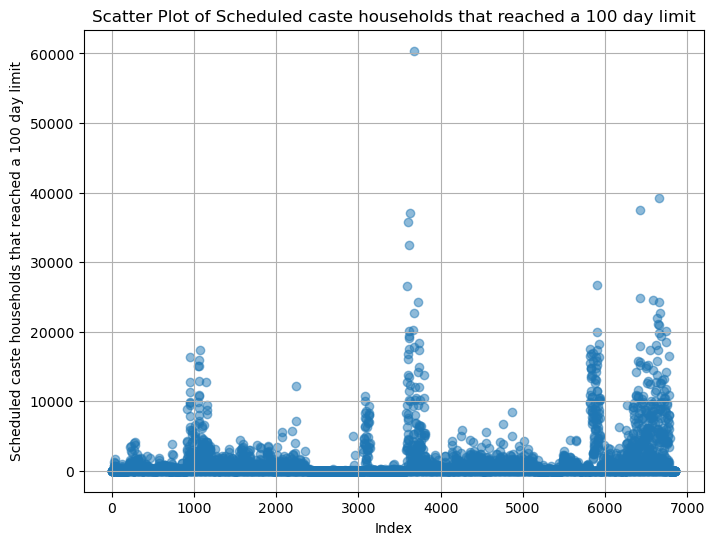

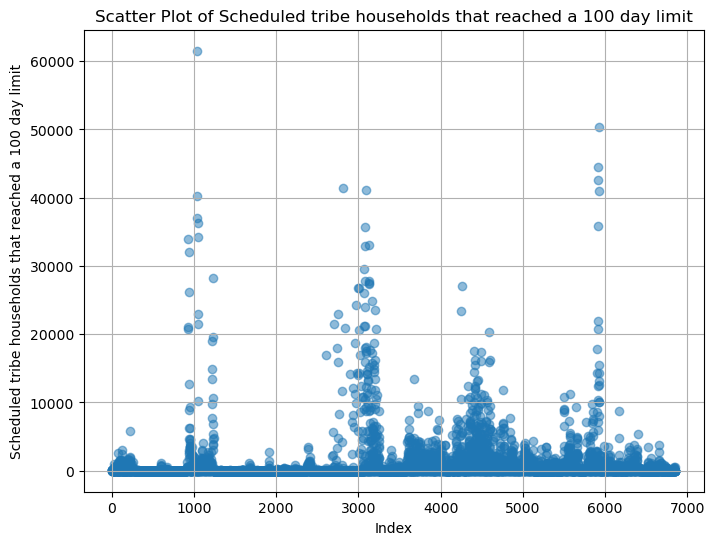

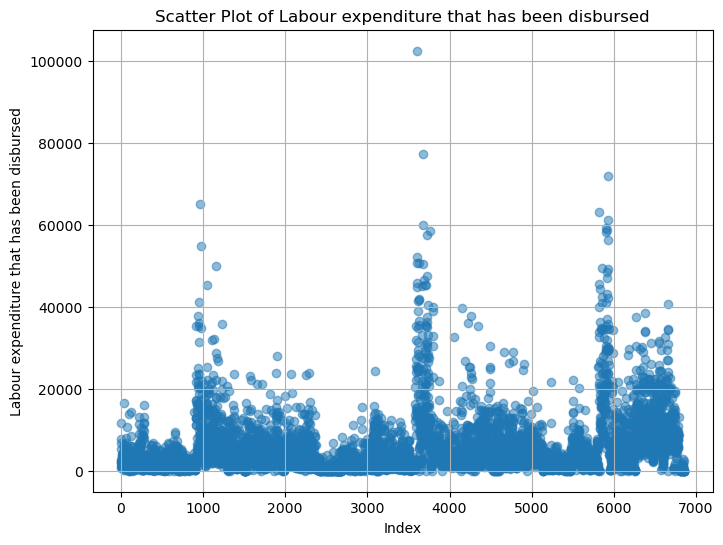

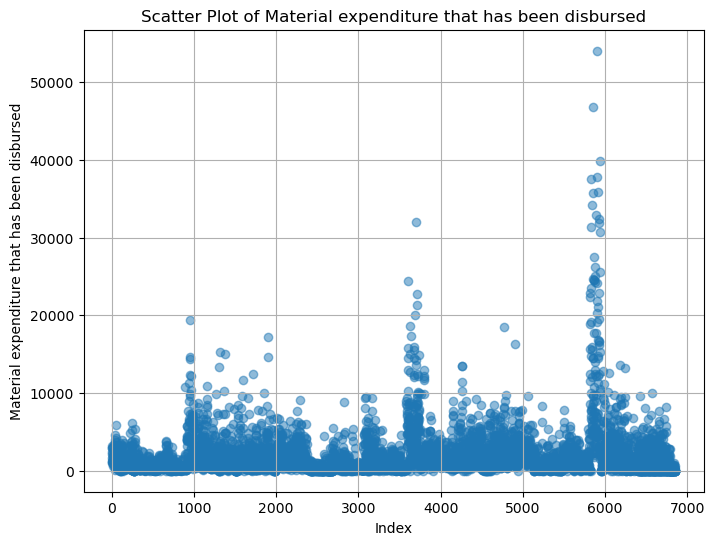

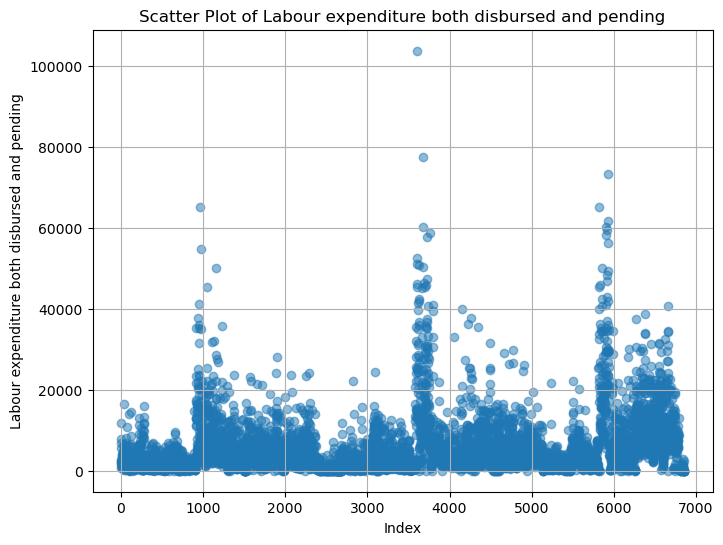

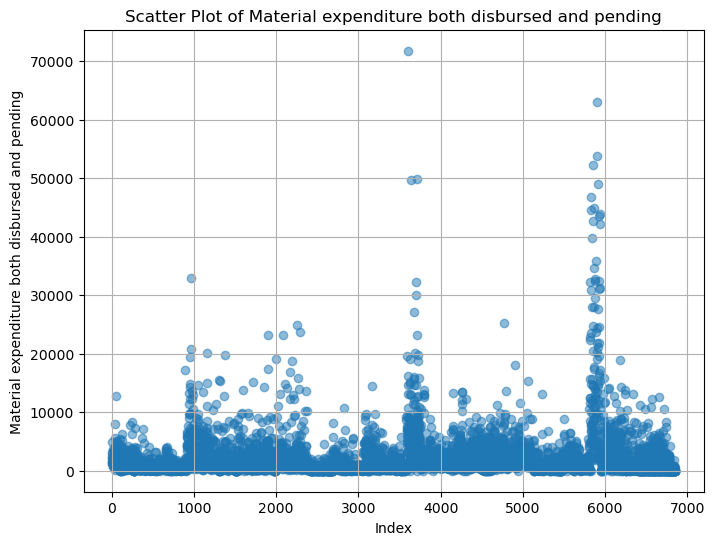

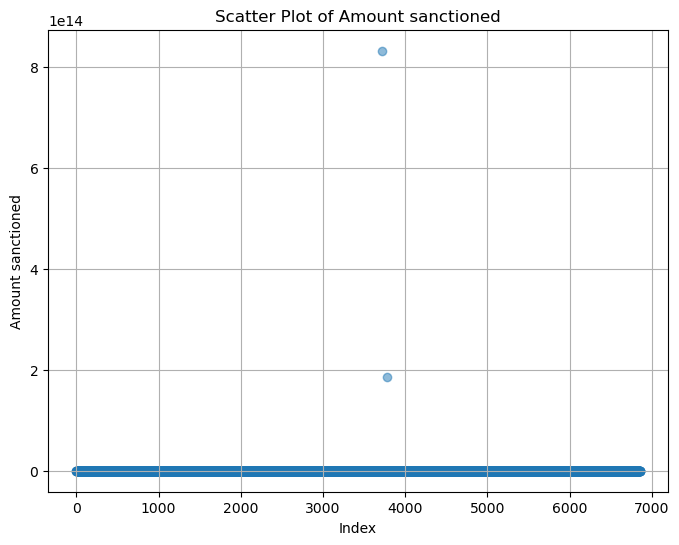

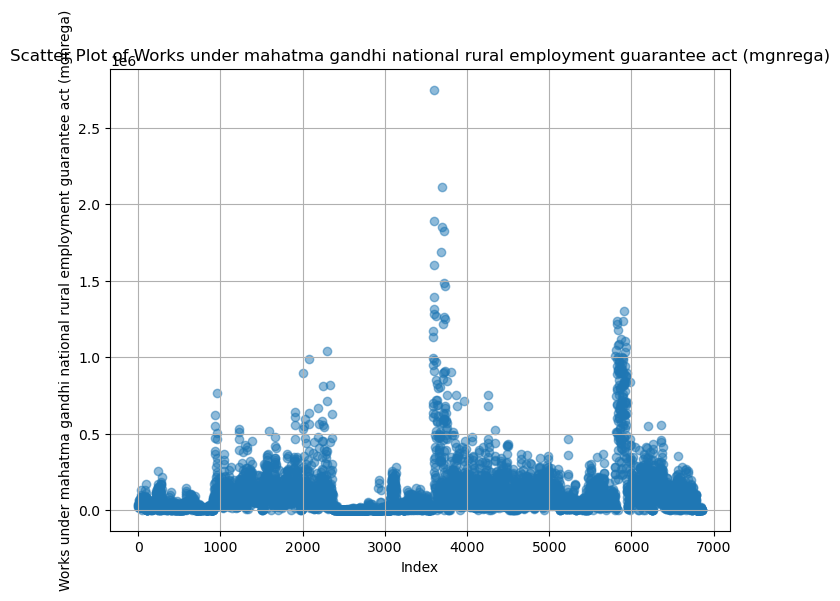

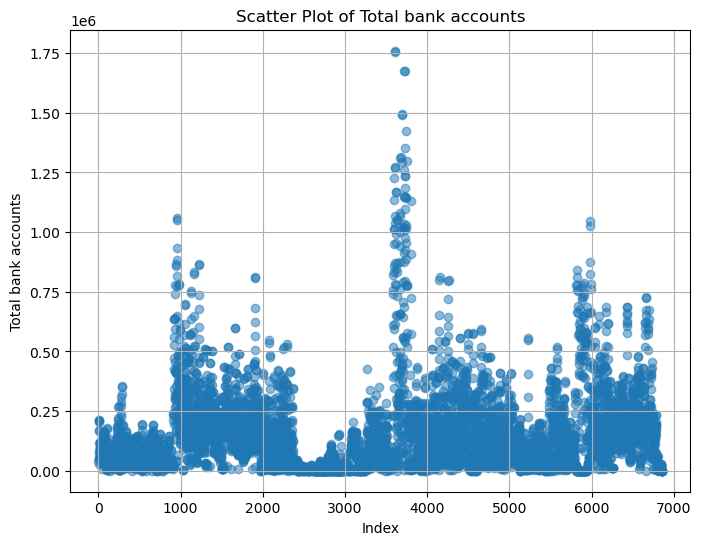

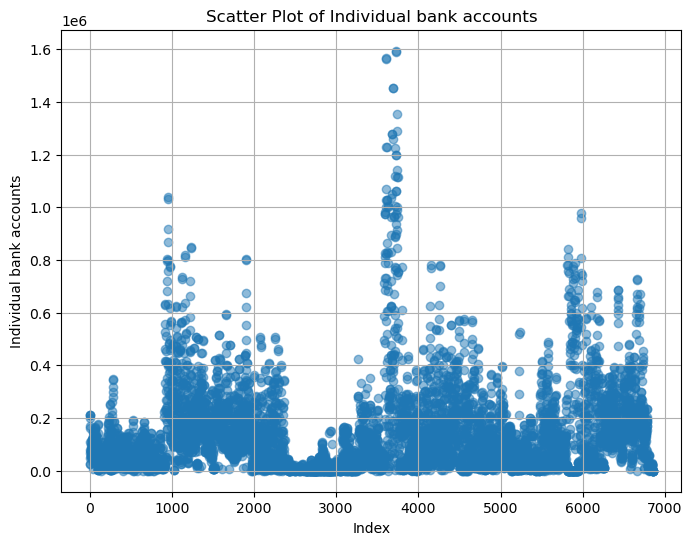

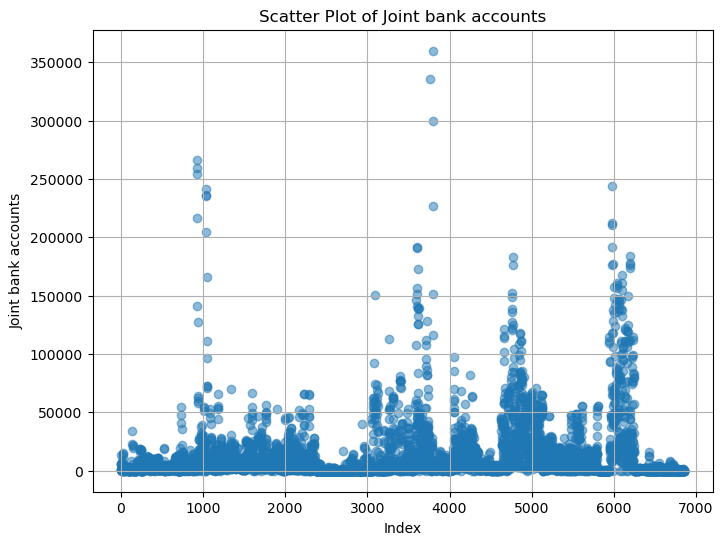

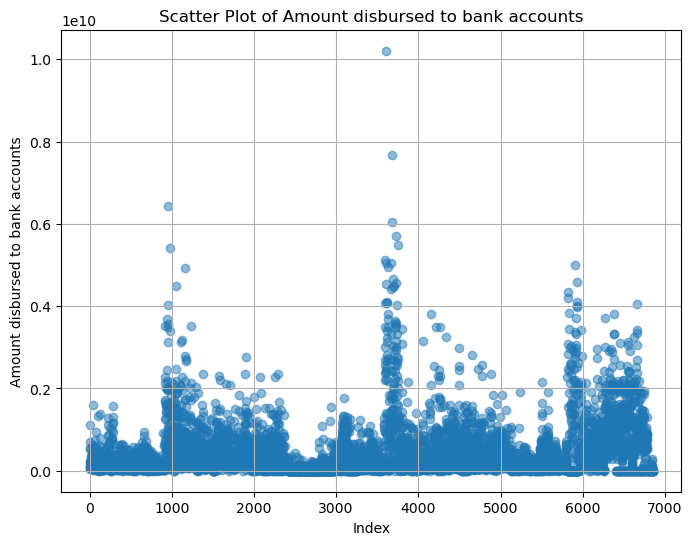

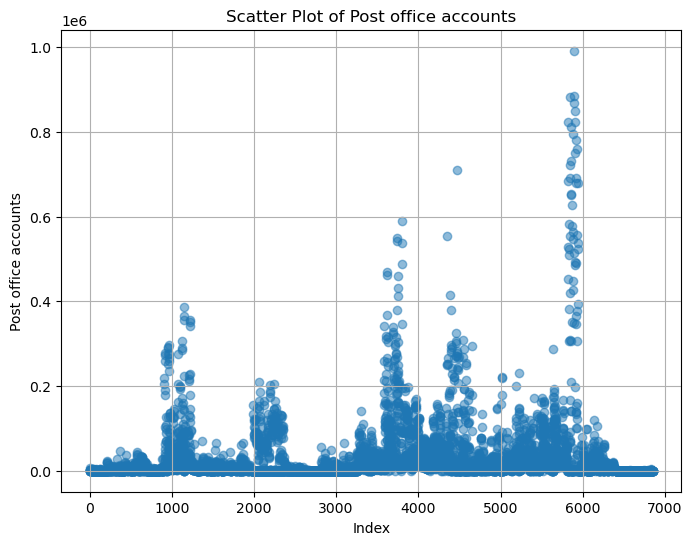

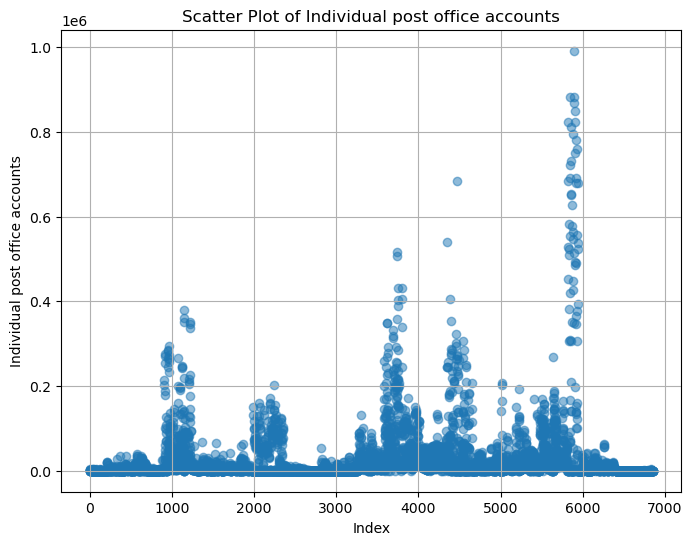

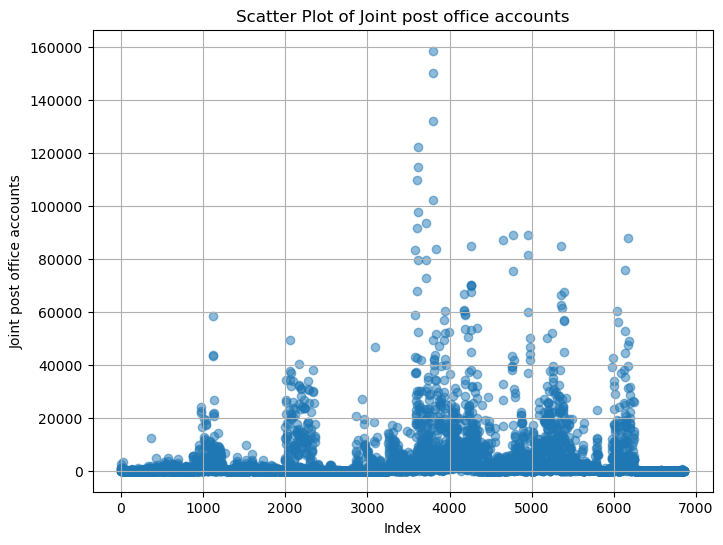

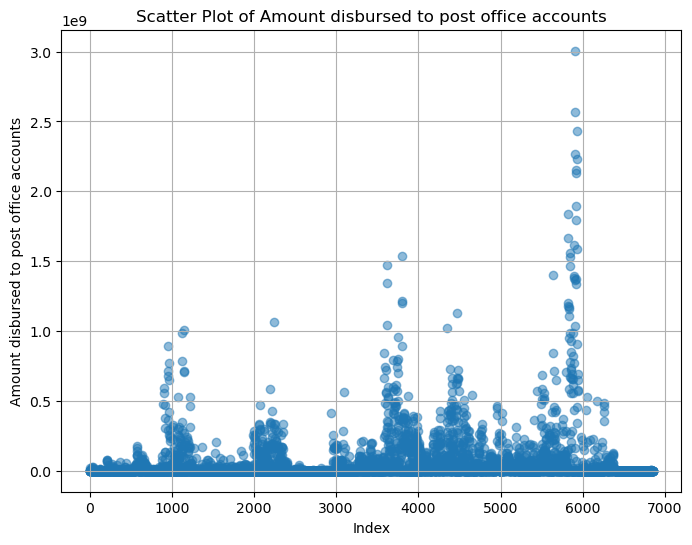

In [25]:

for column in dfnew.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':  # Check if the column is numerical
        plt.figure(figsize=(8, 6))
        plt.scatter(df.index, df[column], alpha=0.5)
        plt.title(f'Scatter Plot of {column}')
        plt.xlabel('Index')
        plt.ylabel(column)
        plt.grid(True)
        plt.show()


In [26]:
df.to_csv('mnrega_clean.csv', index=False) # saving clean csv.... 